<a href="https://colab.research.google.com/github/mmalinda/DS-Core/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2019_12_MMalinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Core Week 4 Independent Project - Hypothesis Testing

First, The data will be explored and analysed to formulate a claim that will be investigated by hypothesis testing.

## Exploratory Data Analysis

### The question
What claim can we investigate about blue cars from Autolib?

### Metrics for success


1.   Formulate hypotheses to test from the data
2.   Choose an appropriate sampling method to use for the target population



### Context

### Experimental design

### Data relevance
The dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). Therefor the data should be relevant and sufficient to answer the question.

## Reading the Data

In [0]:
# Importing libraries that will be used
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [0]:
# Loading the data
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

## Checking the Data

In [107]:
# Previewing the top of the dataset
df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [108]:
# Previewing the bottom of the dataset
df.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [109]:
# Determining the number of records and data types in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [110]:
# Describing the data
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## External Data Source Validation
The data was collected in real time and was made available to the public by the Autolib’ Métropole joint association. This dataset was put together for the Autolib data scientist from the freely available public data.

## Tidying the Dataset

In [111]:
# Identifying any missing data
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing values in this dataset

In [112]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicated rows in this dataset

In [113]:
# Standardising column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

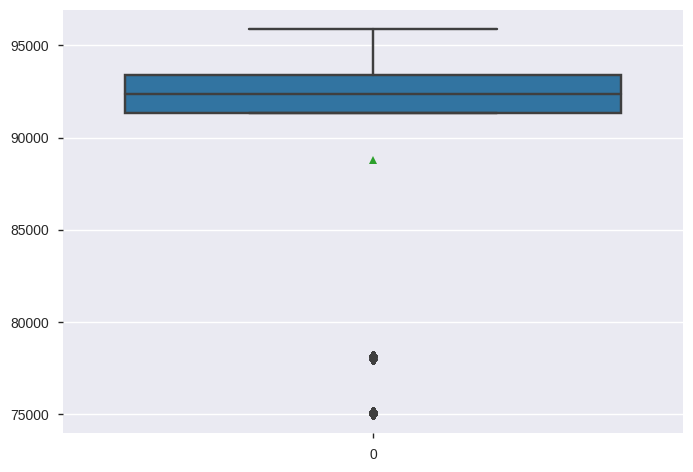

In [114]:
#Checking for outliers by postal code
sns.boxplot(data=df['postal_code'], showmeans = True)

In [115]:
# Viewing the outliers
df[df['postal_code'] < 80000].postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150])

All of the postal codes are in an acceptable range. They may be from a different geographical location (far from the rest of the stations). No action will be taken.

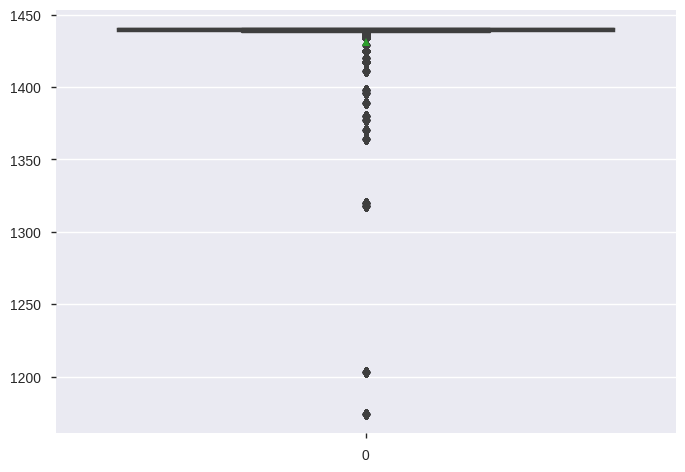

In [116]:
#Checking for outliers by daily data points
sns.boxplot(data=df['n_daily_data_points'], showmeans = True)

In [117]:
df.groupby(df['n_daily_data_points']).count()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
n_daily_data_points,,,,,,,,,,,,
1174,104,104,104,104,104,104,104,104,104,104,104,104
1203,103,103,103,103,103,103,103,103,103,103,103,103
1318,103,103,103,103,103,103,103,103,103,103,103,103
1320,103,103,103,103,103,103,103,103,103,103,103,103
1364,103,103,103,103,103,103,103,103,103,103,103,103
1370,94,94,94,94,94,94,94,94,94,94,94,94
1377,102,102,102,102,102,102,102,102,102,102,102,102
1380,103,103,103,103,103,103,103,103,103,103,103,103
1389,103,103,103,103,103,103,103,103,103,103,103,103


We will focus on the dates missing more than 3 daily data points for aggregation.

In [127]:
# Checking the number of selected outliers 
df[df['n_daily_data_points'] < 1437].count()

postal_code               2259
date                      2259
n_daily_data_points       2259
dayofweek                 2259
day_type                  2259
bluecars_taken_sum        2259
bluecars_returned_sum     2259
utilib_taken_sum          2259
utilib_returned_sum       2259
utilib_14_taken_sum       2259
utilib_14_returned_sum    2259
slots_freed_sum           2259
slots_taken_sum           2259
dtype: int64

In [128]:
df.count()

postal_code               16085
date                      16085
n_daily_data_points       16085
dayofweek                 16085
day_type                  16085
bluecars_taken_sum        16085
bluecars_returned_sum     16085
utilib_taken_sum          16085
utilib_returned_sum       16085
utilib_14_taken_sum       16085
utilib_14_returned_sum    16085
slots_freed_sum           16085
slots_taken_sum           16085
dtype: int64

These records account for less than 15% of total records.

In [129]:
# Checking the profile of the selected outliers
df[df['n_daily_data_points'] < 1437].nunique()

postal_code               104
date                       22
n_daily_data_points        19
dayofweek                   7
day_type                    2
bluecars_taken_sum        457
bluecars_returned_sum     449
utilib_taken_sum           38
utilib_returned_sum        37
utilib_14_taken_sum        70
utilib_14_returned_sum     70
slots_freed_sum           197
slots_taken_sum           187
dtype: int64

In [119]:
# Checking the profile of all records in the dataset
df.nunique()

postal_code               104
date                      156
n_daily_data_points        23
dayofweek                   7
day_type                    2
bluecars_taken_sum        932
bluecars_returned_sum     929
utilib_taken_sum           48
utilib_returned_sum        49
utilib_14_taken_sum        92
utilib_14_returned_sum     94
slots_freed_sum           297
slots_taken_sum           301
dtype: int64

In [130]:
# Checking the distribution of dates for the outliers
df[df['n_daily_data_points'] < 1437].date.unique()

array(['1/4/2018', '1/24/2018', '1/25/2018', '2/19/2018', '2/20/2018',
       '2/24/2018', '2/28/2018', '3/1/2018', '3/25/2018', '3/30/2018',
       '4/6/2018', '4/7/2018', '4/18/2018', '4/19/2018', '4/20/2018',
       '4/23/2018', '5/4/2018', '5/8/2018', '5/23/2018', '5/24/2018',
       '5/31/2018', '6/19/2018'], dtype=object)

In [131]:
# Confirming that the outliers are not only on weekends or weekdays
df[df['n_daily_data_points'] < 1437].groupby(df['day_type']).nunique()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
day_type,,,,,,,,,,,,,
weekday,104,19,16,5,1,427,418,35,35,67,65,184,175
weekend,103,3,3,2,1,147,145,27,29,48,46,55,57


In [133]:
# Checking the distribution of the data points by day of the week
df[df['n_daily_data_points'] < 1437].groupby(df['dayofweek']).count()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
dayofweek,,,,,,,,,,,,,
0,206,206,206,206,206,206,206,206,206,206,206,206,206
1,301,301,301,301,301,301,301,301,301,301,301,301,301
2,414,414,414,414,414,414,414,414,414,414,414,414,414
3,621,621,621,621,621,621,621,621,621,621,621,621,621
4,413,413,413,413,413,413,413,413,413,413,413,413,413
5,201,201,201,201,201,201,201,201,201,201,201,201,201
6,103,103,103,103,103,103,103,103,103,103,103,103,103


In [134]:
# Checking that the records are not from specific postal codes
df[df['n_daily_data_points'] < 1437].groupby(df['postal_code']).count()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,,,,,,,,,,,,,
75001,22,22,22,22,22,22,22,22,22,22,22,22,22
75002,22,22,22,22,22,22,22,22,22,22,22,22,22
75003,22,22,22,22,22,22,22,22,22,22,22,22,22
75004,22,22,22,22,22,22,22,22,22,22,22,22,22
75005,22,22,22,22,22,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94700,22,22,22,22,22,22,22,22,22,22,22,22,22
94800,22,22,22,22,22,22,22,22,22,22,22,22,22
95100,22,22,22,22,22,22,22,22,22,22,22,22,22


Less than 15% of the records have more than 3 data points missing and there does not seem to be much bias in their distribution, apart from days of the week which will be corrected during sampling. Since the number of data points available for aggregation will affect the results of the analysis, the records can be deleted.

In [0]:
#Dropping the selected outliers
df.drop(df[df['n_daily_data_points'] < 1437].index, inplace=True)

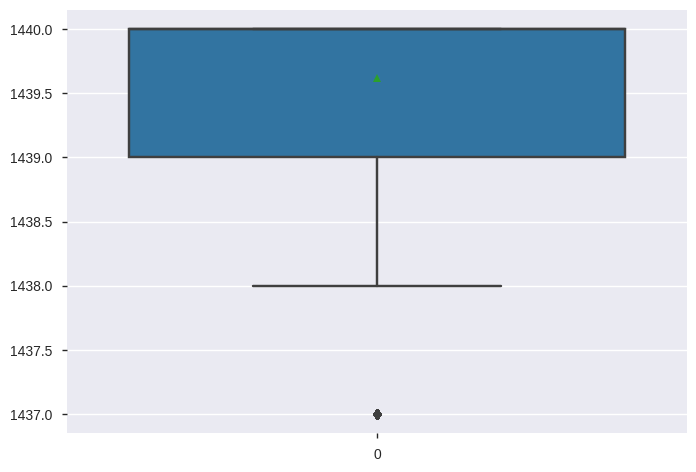

In [136]:
# Checking the new distribution
sns.boxplot(data=df['n_daily_data_points'], showmeans = True)

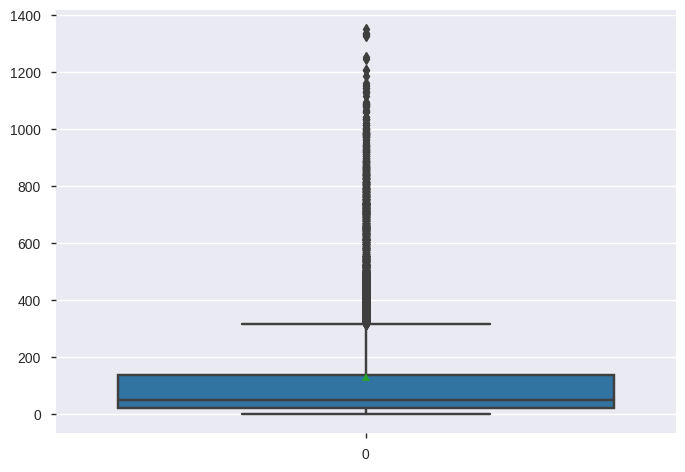

In [137]:
#Checking for outliers by bluecars taken
sns.boxplot(data=df['bluecars_taken_sum'], showmeans = True)

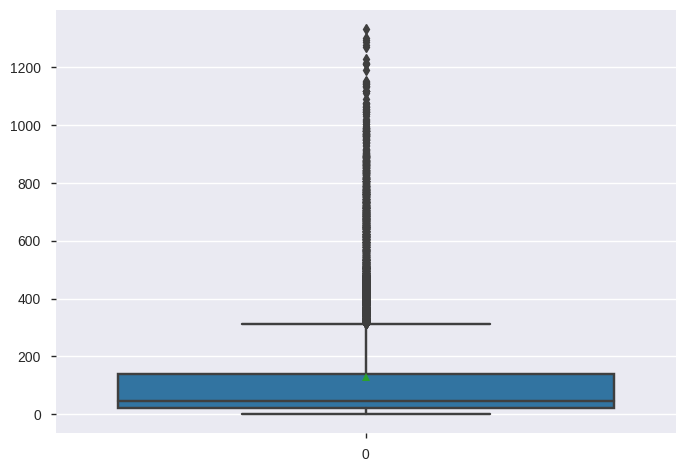

In [138]:
#Checking for outliers by bluecars returned
sns.boxplot(data=df['bluecars_returned_sum'], showmeans = True)

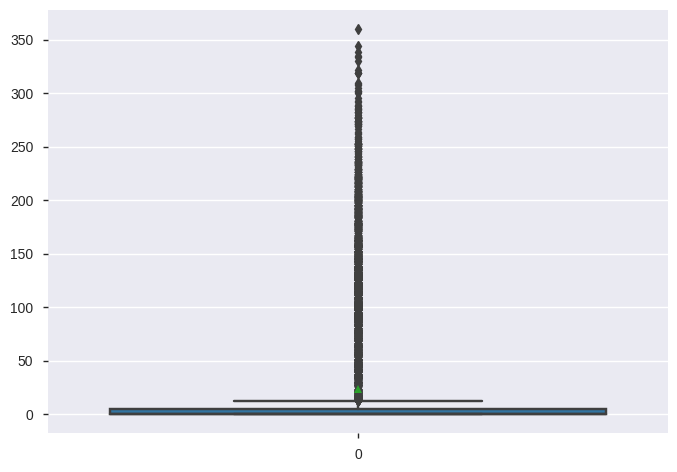

In [150]:
#Checking for outliers by slots freed
sns.boxplot(data=df['slots_freed_sum'], showmeans = True)

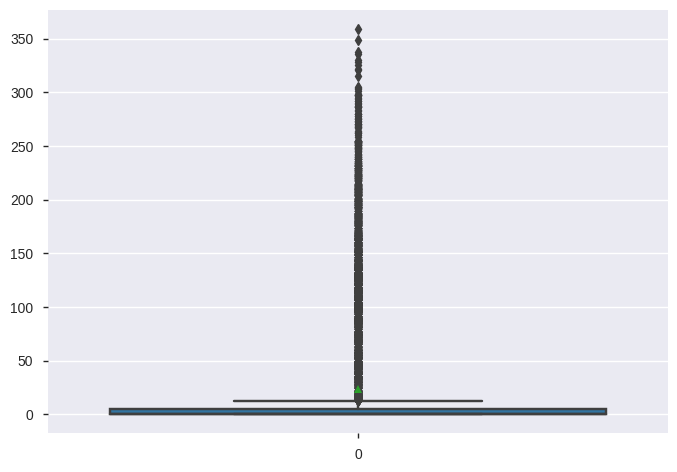

In [151]:
#Checking for outliers by slots taken
sns.boxplot(data=df['slots_taken_sum'], showmeans = True)

There are no extreme outliers for these four variables, hence no action will be taken.

The data on utilib cars will not be used for this analysis, so these columns will be dropped from the dataset.

In [139]:
# Dropping the utilib columns
df.drop(columns=['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], inplace = True)
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

## Exploratory Analysis

### Univariate Analysis

n_daily_data_points
Mean: 1439.6197020107045
Median: 1440.0
Mode: 0    1440
dtype: int64
SD: 0.7201764487569495
Variance: 0.5186541173441711
Range: 3
Quartiles: 0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64
Skewness: -2.037281642736852
Kurtosis: 3.7045109826569864


bluecars_taken_sum
Mean: 128.86127585708087
Median: 48.0
Mode: 0    12
dtype: int64
SD: 188.2198379789733
Variance: 35426.70740883095
Range: 1352
Quartiles: 0.25     21.0
0.50     48.0
0.75    139.0
Name: bluecars_taken_sum, dtype: float64
Skewness: 2.383801476107762
Kurtosis: 6.018868367817744


bluecars_returned_sum
Mean: 128.8988138290178
Median: 47.0
Mode: 0    13
dtype: int64
SD: 188.52893532083138
Variance: 35543.15945320622
Range: 1332
Quartiles: 0.25     21.0
0.50     47.0
0.75    138.0
Name: bluecars_returned_sum, dtype: float64
Skewness: 2.3904441517654993
Kurtosis: 6.04304326375143


slots_freed_sum
Mean: 23.19166787212498
Median: 0.0
Mode: 0    0
dtype: int64
SD: 53.04369

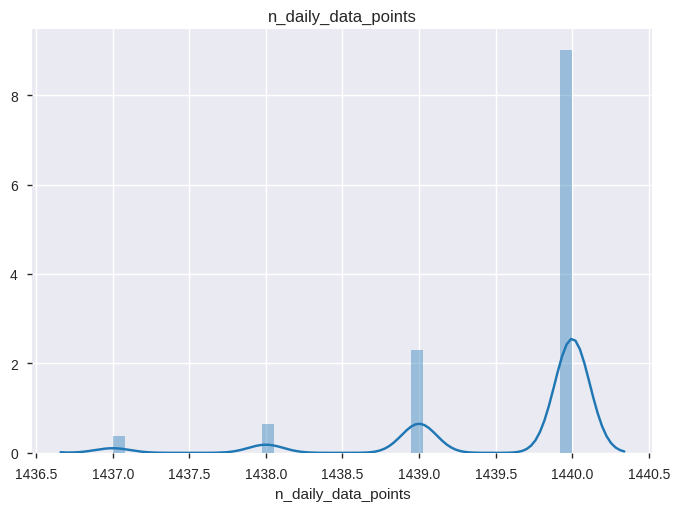

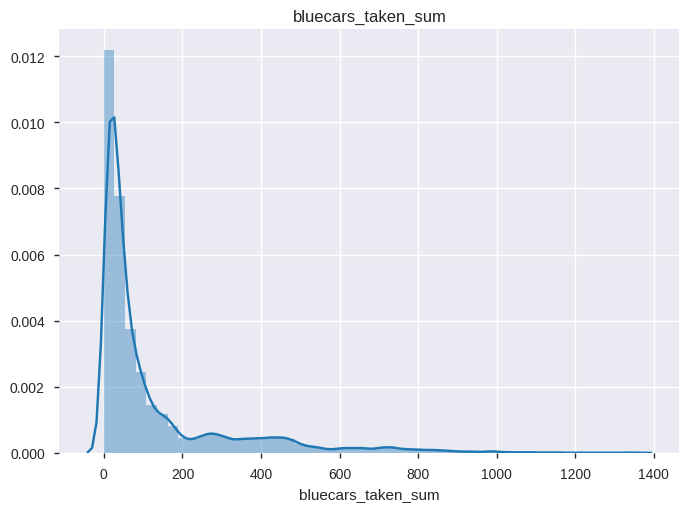

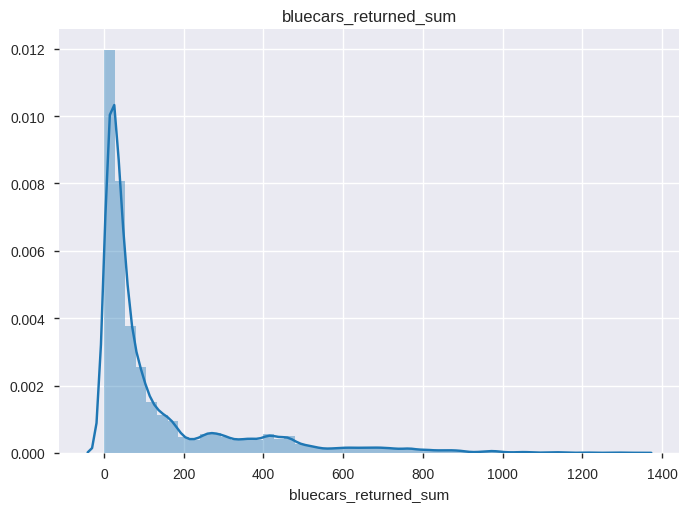

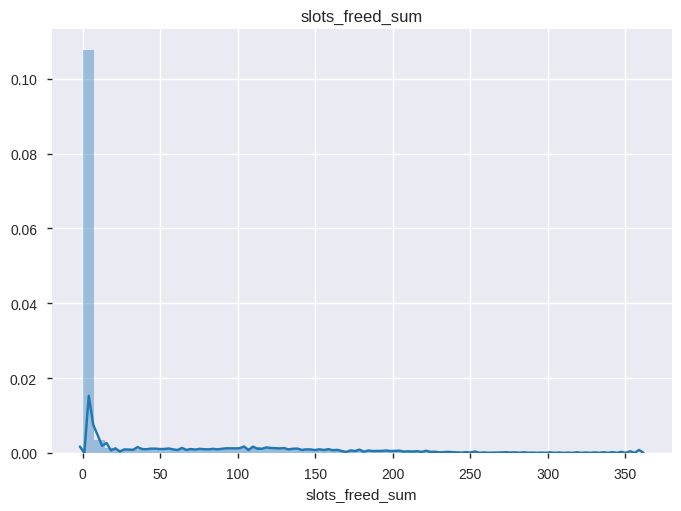

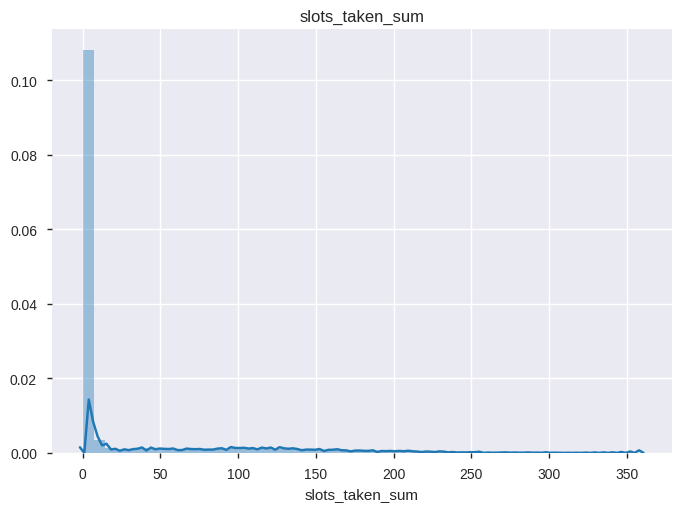

In [149]:
# Checking distribution and calculating measures of central tendency 
# and dispersion for numerical variables
col_names_num = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum' ]
for i, col_val in enumerate(col_names_num):
  print(col_val)

  plt.figure(i)
  sns.distplot(df[col_val], kde=True)
  plt.title(col_val)

  print("Mean:", df[col_val].mean())
  print("Median:", df[col_val].median())
  print("Mode:", df[col_val].mode())
  print("SD:", df[col_val].std())
  print("Variance:", df[col_val].var())
  col_val_max = df[col_val].max()
  col_val_min = df[col_val].min()
  print("Range:", col_val_max - col_val_min)
  print("Quartiles:", df[col_val].quantile([0.25,0.5,0.75]))
  print("Skewness:", df[col_val].skew())
  print("Kurtosis:", df[col_val].kurt())
  print("\n")

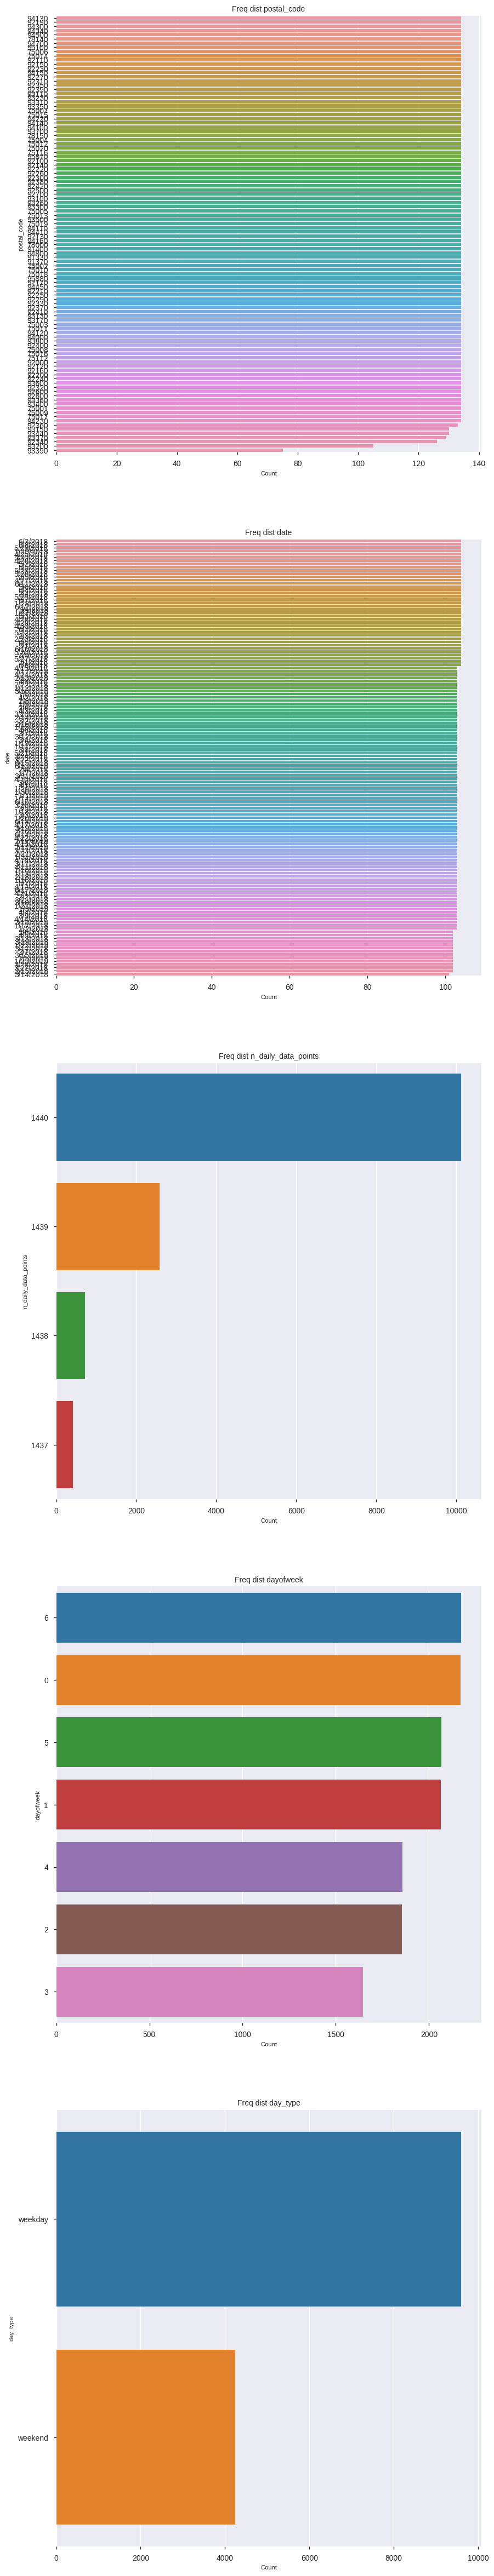

In [155]:
# Plotting count plots for categorical variables
col_names_cat = ['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type']

fig, ax = plt.subplots(len(col_names_cat), figsize=(10, 60))

for i, col_val in enumerate(col_names_cat):
        
    sns.countplot(y = df[col_val], order = df[col_val].value_counts().index, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_ylabel(col_val, fontsize=8)
    ax[i].set_xlabel('Count', fontsize=8)


### Univariate Summary
The data is well distributed by date and postal code. There are some disparities in data collection by day of the week and day type, which should be corrected during sampling.
The data on bluecars taken/returned and slots taken/freed is heavily skewed and light tailed. There is a lot of variation in the data as seen from the measures of central tendency. The distribution of these numerical variables will be checked after sampling.

### Bivariate Analysis

# Sampling

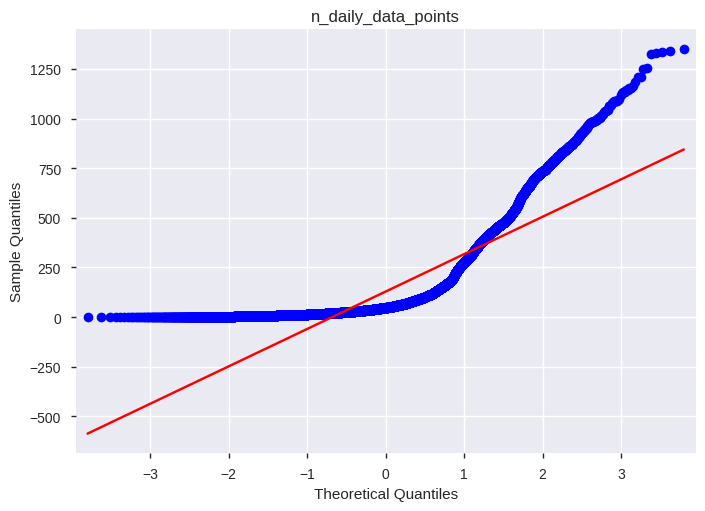

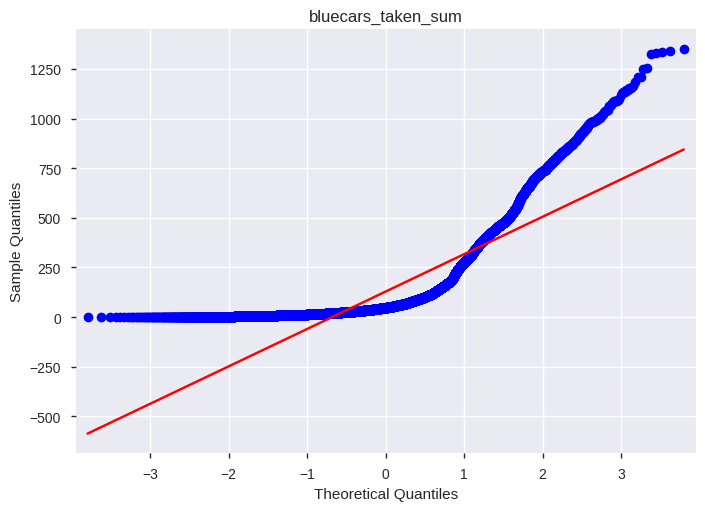

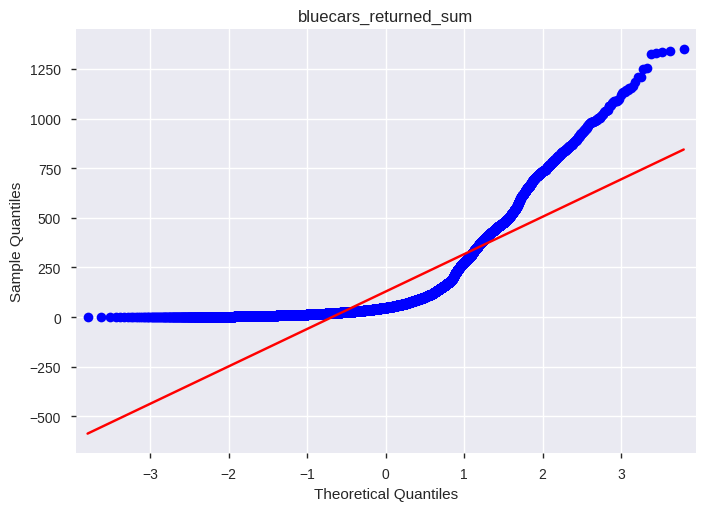

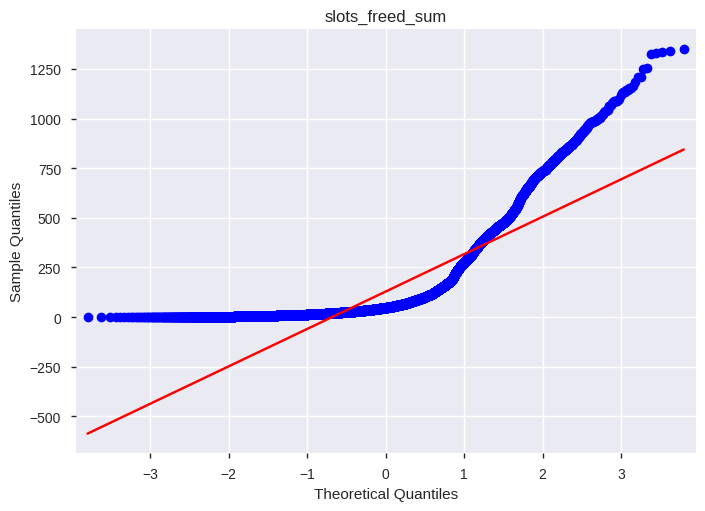

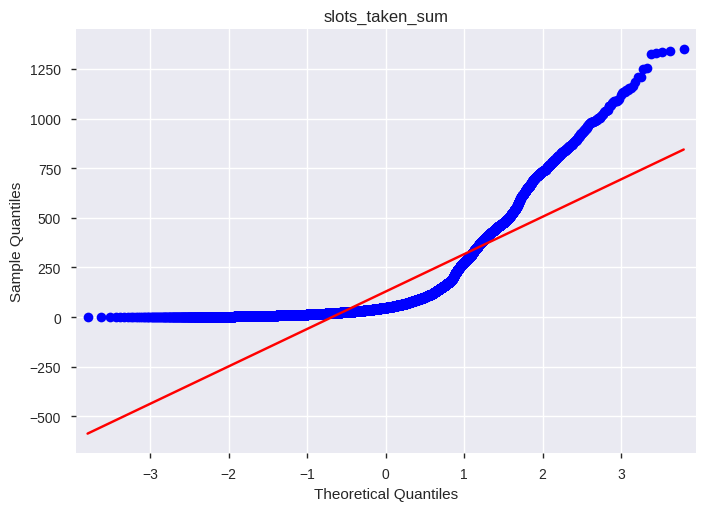

In [153]:
# Testing for normality
for i, col_val in enumerate(col_names_num):
  qqplot(df['bluecars_taken_sum'], line='s')
  pyplot.title(col_val)
  pyplot.show()


# Hypothesis Testing